In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib

%matplotlib inline

In [4]:
np.seed(111)

In [6]:
# Function to generate test data
def CreateDataSet(Number=1):
    
    Output = []
    
    for i in range(Number):
        
        # Create a weekly (mondays) date range
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')
        
        # Create random data
        data = np.randint(low=25,high=1000,size=len(rng))
        
        # Status pool
        status = [1,2,3]
        
        # Make a random list of statuses
        random_status = [status[np.randint(low=0,high=len(status))] for i in range(len(rng))]
        
        # State pool
        states = ['GA','FL','fl','NY','NJ','TX']
        
        # Make a random list of states 
        random_states = [states[np.randint(low=0,high=len(states))] for i in range(len(rng))]
    
        Output.extend(zip(random_states, random_status, data, rng))
        
    return Output

In [8]:
dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset, columns=['State','Status','CustomerCount','StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 0 to 835
Data columns (total 4 columns):
State            836 non-null object
Status           836 non-null int64
CustomerCount    836 non-null int64
StatusDate       836 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 32.7+ KB


In [10]:
df.head()

,State,Status,CustomerCount,StatusDate
0,FL,2,454,2009-01-05
1,FL,1,319,2009-01-12
2,TX,2,78,2009-01-19
3,NJ,3,691,2009-01-26
4,NJ,3,634,2009-02-02


In [12]:
df.to_excel('Lesson3.xlsx',index=False)
print('Done')

Done


In [14]:
pd.read_excel?

In [17]:
Location = 'Lesson3.xlsx'

df = pd.read_excel(Location, 0, index_col='StatusDate')
df.dtypes

State            object
Status            int64
CustomerCount     int64
dtype: object

In [18]:
df.index

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name=u'StatusDate', length=836, freq=None)

In [19]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,FL,2,454
2009-01-12,FL,1,319
2009-01-19,TX,2,78
2009-01-26,NJ,3,691
2009-02-02,NJ,3,634


In [20]:
df['State'].unique()

array([u'FL', u'TX', u'NJ', u'fl', u'NY', u'GA'], dtype=object)

In [22]:
df['State'] = df.State.apply(lambda x: x.upper())

In [23]:
df['State'].unique()

array([u'FL', u'TX', u'NJ', u'NY', u'GA'], dtype=object)

In [24]:
mask = df['Status'] == 1
df = df[mask]

In [25]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-12,FL,1,319
2009-03-30,GA,1,63
2009-04-20,FL,1,788
2009-05-11,NJ,1,199
2009-06-22,FL,1,997


In [26]:
mask = df.State == 'NJ'
df['State'][mask] = 'NY'

In [28]:
df['State'].unique()

array([u'FL', u'GA', 'NY', u'TX'], dtype=object)

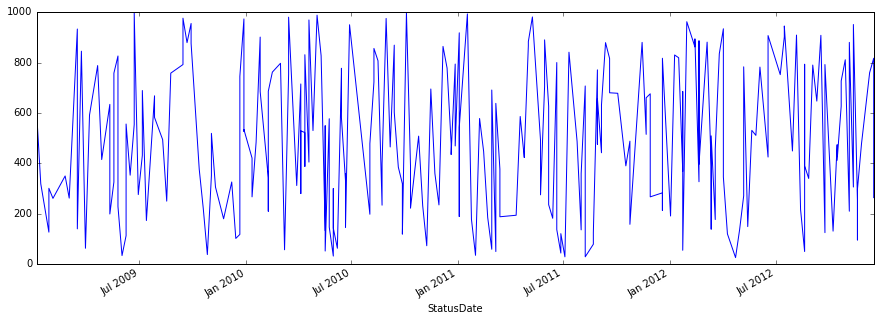

In [30]:
df['CustomerCount'].plot(figsize=(15,5));

In [32]:
sortdf = df[df['State']=='NY'].sort_index(axis=0)
sortdf.head(10)

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,NY,1,681
2009-02-23,NY,1,350
2009-03-16,NY,1,140
2009-04-27,NY,1,415
2009-05-11,NY,1,199
2009-05-18,NY,1,758
2009-06-22,NY,1,554
2009-06-29,NY,1,276
2009-07-06,NY,1,633


In [49]:
Daily = df.reset_index().groupby(['State','StatusDate']).sum()
Daily.head()

Status  CustomerCount
State StatusDate                       
FL    2009-01-12       1            319
      2009-01-26       1            127
      2009-02-02       1            261
      2009-04-20       1            788
      2009-05-18       1            326

In [50]:
del Daily['Status']
Daily.head(10)

CustomerCount
State StatusDate               
FL    2009-01-12            319
      2009-01-26            127
      2009-02-02            261
      2009-04-20            788
      2009-05-18            326
      2009-05-25           1055
      2009-06-15            353
      2009-06-22            997
      2009-07-06           1121
      2009-07-13            173

In [51]:
Daily.index

MultiIndex(levels=[[u'FL', u'GA', u'NY', u'TX'], [2009-01-05 00:00:00, 2009-01-12 00:00:00, 2009-01-26 00:00:00, 2009-02-02 00:00:00, 2009-02-23 00:00:00, 2009-03-02 00:00:00, 2009-03-16 00:00:00, 2009-03-23 00:00:00, 2009-03-30 00:00:00, 2009-04-06 00:00:00, 2009-04-20 00:00:00, 2009-04-27 00:00:00, 2009-05-11 00:00:00, 2009-05-18 00:00:00, 2009-05-25 00:00:00, 2009-06-01 00:00:00, 2009-06-08 00:00:00, 2009-06-15 00:00:00, 2009-06-22 00:00:00, 2009-06-29 00:00:00, 2009-07-06 00:00:00, 2009-07-13 00:00:00, 2009-07-27 00:00:00, 2009-08-10 00:00:00, 2009-08-17 00:00:00, 2009-08-24 00:00:00, 2009-09-14 00:00:00, 2009-09-21 00:00:00, 2009-09-28 00:00:00, 2009-10-12 00:00:00, 2009-10-19 00:00:00, 2009-10-26 00:00:00, 2009-11-02 00:00:00, 2009-11-09 00:00:00, 2009-11-23 00:00:00, 2009-12-07 00:00:00, 2009-12-14 00:00:00, 2009-12-21 00:00:00, 2009-12-28 00:00:00, 2010-01-11 00:00:00, 2010-01-18 00:00:00, 2010-01-25 00:00:00, 2010-02-08 00:00:00, 2010-02-15 00:00:00, 2010-03-01 00:00:00, 2010-

In [53]:
Daily.index.levels[1]

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-26', '2009-02-02',
               '2009-02-23', '2009-03-02', '2009-03-16', '2009-03-23',
               '2009-03-30', '2009-04-06',
               ...
               '2012-10-08', '2012-10-15', '2012-10-22', '2012-10-29',
               '2012-11-05', '2012-11-12', '2012-11-19', '2012-11-26',
               '2012-12-10', '2012-12-17'],
              dtype='datetime64[ns]', name=u'StatusDate', length=162, freq=None)

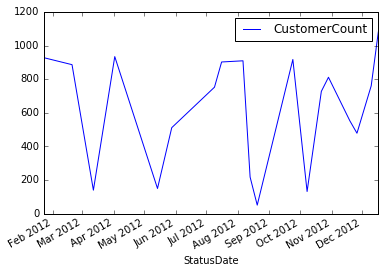

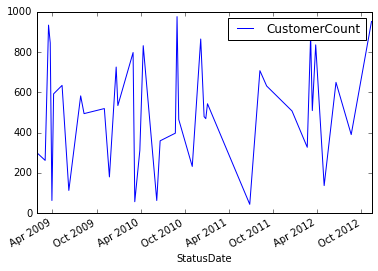

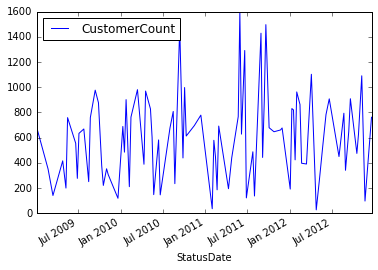

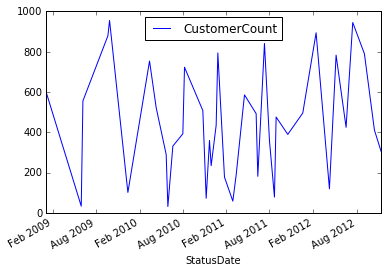

In [60]:
Daily.loc['FL']['2012'].plot()
Daily.loc['GA'].plot()
Daily.loc['NY'].plot()
Daily.loc['TX'].plot()

In [71]:
# Calculate Outliers
StateYearMonth = Daily.groupby([Daily.index.get_level_values(0), Daily.index.get_level_values(1).year, Daily.index.get_level_values(1).month])

Daily['Lower'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )

Daily['25'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.25) )
Daily['75'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.75) )
Daily['test'] = StateYearMonth['CustomerCount'].transform( lambda x: 1.5*x.quantile(q=.75)-x.quantile(q=.25) )


Daily['Upper'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Outlier'] = (Daily['CustomerCount'] < Daily['Lower']) | (Daily['CustomerCount'] > Daily['Upper']) 

Daily.head(10)

# Remove Outliers
Daily = Daily[Daily['Outlier'] == False]